In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from statsmodels.api import OLS

In [2]:
raw_market = pd.read_pickle('ryu_mktcap.pickle')
raw_price = pd.read_pickle('ryu_price.pickle')

raw_market.index = pd.to_datetime(raw_market.index)
raw_price.index = pd.to_datetime(raw_price.index)

In [3]:
# masked_mktcap = raw_market[marketcap_moving_average>1_000_000]
# masked_price = raw_price[marketcap_moving_average>1_000_000]

masked_mktcap = raw_market[raw_market>1_000_000]
masked_price = raw_price[raw_market>1_000_000]

In [4]:
# effect_of_shares = raw_market / (raw_market.shift(1)*(1+raw_price.pct_change()))
# effect_of_shares = effect_of_shares -1

effect_of_shares = masked_mktcap / (masked_mktcap.shift(1)*(1+masked_price.pct_change(fill_method=None)))
effect_of_shares = effect_of_shares -1

In [6]:
# for i, val in enumerate(effect_of_shares.max()):
#     if np.abs(val) > 10000:
#         print(effect_of_shares.columns[i], val)

In [5]:
problems = []
for i,val in enumerate(effect_of_shares.sum()):
    if np.abs(val) > 1000:
        problems.append(effect_of_shares.columns[i])
    elif val < -0.9:
        problems.append(effect_of_shares.columns[i])
print(len(problems))

10


In [8]:
clean_mktcap = masked_mktcap.drop(problems, axis=1)
clean_price = masked_price.drop(problems, axis=1)

In [22]:
# problems2 = []
# for i, val in enumerate(masked_mktcap.pct_change().max()):
#     if val > 10000:
#         problems2.append(masked_mktcap.columns[i])
#         #print(clean_mktcap.columns[i], val)

# clean_mktcap = clean_mktcap.drop(problems2, axis=1)
# clean_price = clean_price.drop(problems2, axis=1)

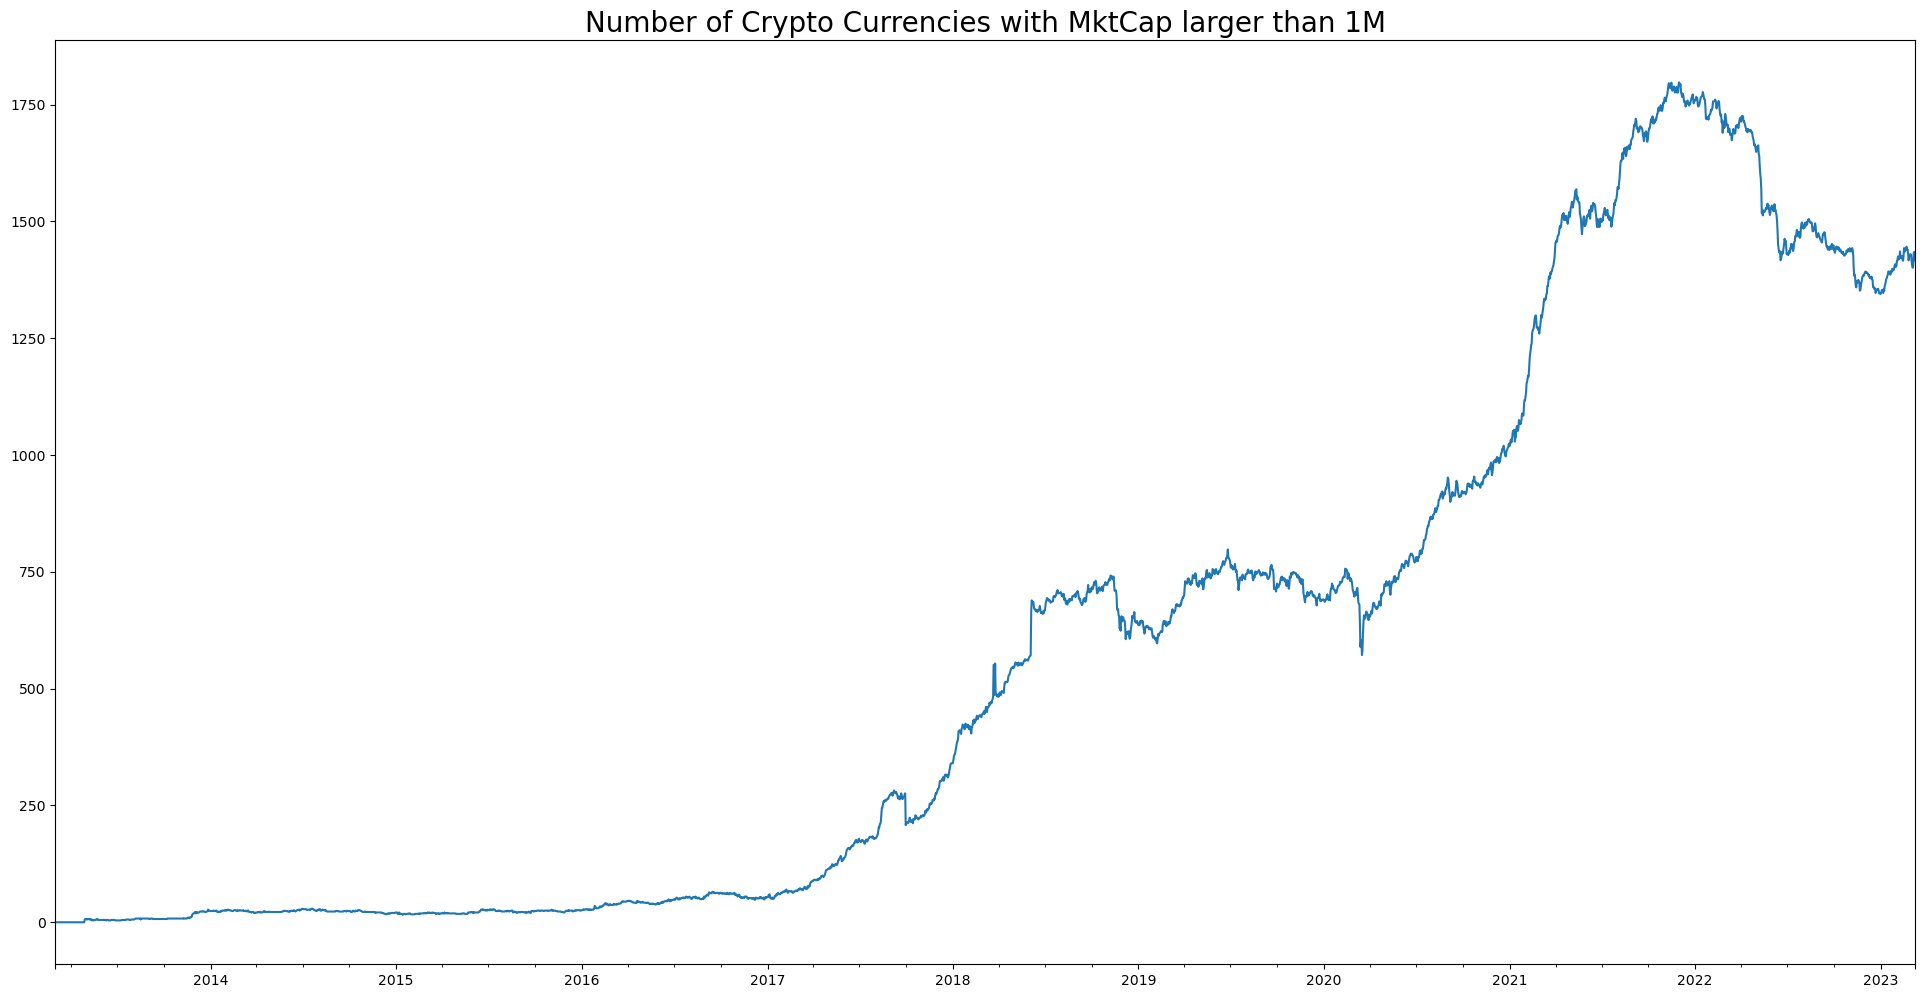

In [9]:
plt.figure()
plt.title("Number of Crypto Currencies with MktCap larger than 1M", size=20)
masked_mktcap.count(1).plot(figsize=(24,12));

In [9]:
clean_mktcap_moving_average = clean_mktcap.rolling(20).mean()
clean_mktcap = clean_mktcap[clean_mktcap_moving_average>1_000_000]
clean_price = clean_price[clean_mktcap_moving_average>1_000_000]

<AxesSubplot:title={'center':'Number of Crypto Currencies with MktCap larger than 1M'}>

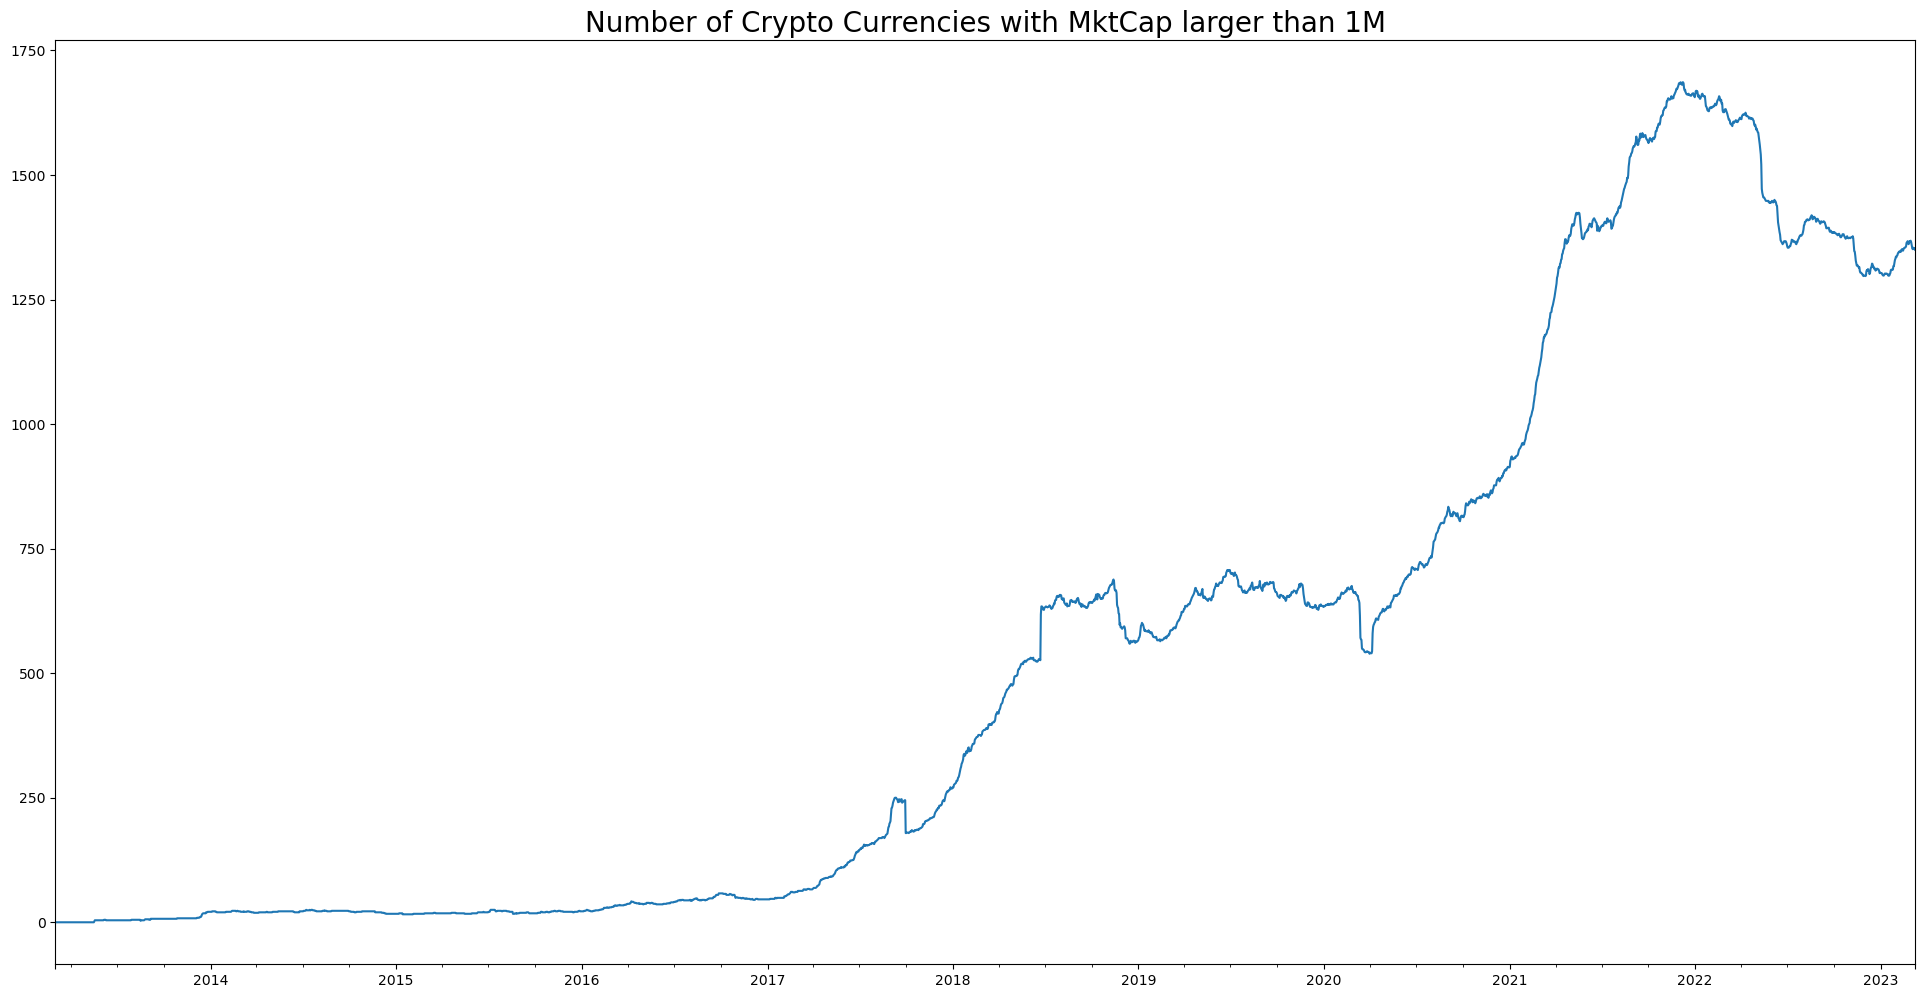

In [11]:
plt.figure()
plt.title("Number of Crypto Currencies with MktCap larger than 1M", size=20)
clean_mktcap.count(1).plot(figsize=(24,12))

In [10]:
for year in ["2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"]:
    numbers = (len(clean_price.columns) - clean_price.loc[year].isna().sum(1)).max()
    tmp_mktcap = clean_mktcap.loc[year]

    if year == "2013":
        print("year", "Number", "Mean", "Median")
    print(year, numbers, tmp_mktcap.mean(axis=0).mean()/1_000_000, tmp_mktcap.median(axis=0).median()/1_000_000)

print('total', (len(clean_price.columns) - clean_price.isna().sum(1)).max(), clean_mktcap.mean(axis=0).mean()/1_000_000, clean_mktcap.median(axis=0).median()/1_000_000)

year Number Mean Median
2013 10 394.1833009846401 8.243669
2014 23 197.65207886725435 2.9554995
2015 21 145.40979008355657 3.184255
2016 53 162.7673122726489 3.57085125
2017 230 444.04631832575546 15.21102025
2018 639 342.580292747409 6.5763685
2019 661 228.73896179582593 4.39362
2020 847 308.92999203759587 5.136996
2021 1593 948.9793792945312 9.9495875
2022 1594 683.0186492714669 5.461912
2023 1315 743.4718549158581 10.9883595
total 1594 259.06330943514564 5.089646


In [11]:
clean_price.to_pickle("ryu_price.pickle")
clean_mktcap.to_pickle("ryu_mktcap.pickle")